In [25]:
#Student Academic Performance Prediction System

# This assignment uses the Student Performance Dataset, which contains information about student's personal details, family background, 
# study habits, lifestyle factors, and academic scores. Each row represents one student, and each column describes a specific factor 
# such as age, study time, absences, or parental education. The goal of this assignment is to predict the final student grade (G3) using 
# these input features. The dataset is cleaned, unnecessary columns are removed, and new useful features are created to improve learning. 
# Finally, the processed data is used to train and evaluate a machine learning model to understand student performance.

In [26]:
import pandas as pd

# Reading the CSV file into a DataFrame
df = pd.read_csv("student-por.csv")

# Displaying first 5 rows to verify data is loaded
print("First 5 rows of the dataset:")
display(df.head())

# Showing number of rows and columns
print("\nShape of the dataset (rows, columns):")
print(df.shape)

# Displaying all column names
print("\nColumn names in the dataset:")
print(df.columns)

# Showing dataset information (data types & missing values)
print("\nDataset information:")
df.info()


First 5 rows of the dataset:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13



Shape of the dataset (rows, columns):
(649, 33)

Column names in the dataset:
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob

In [27]:
# Separate numeric and categorical columns

numeric_columns = df.select_dtypes(include=['int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print("Numeric Columns (Numbers ML can understand directly):")
print(list(numeric_columns))

print("\nCategorical Columns (Text - need conversion later):")
print(list(categorical_columns))

print("\nCount Summary:")
print("Total columns:", df.shape[1])
print("Numeric columns:", len(numeric_columns))
print("Categorical columns:", len(categorical_columns))


Numeric Columns (Numbers ML can understand directly):
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

Categorical Columns (Text - need conversion later):
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

Count Summary:
Total columns: 33
Numeric columns: 16
Categorical columns: 17


In [28]:
# Columns which are not useful for predicting final marks
columns_to_drop = [
    'school',
    'guardian',
    'romantic',
    'nursery',
    'activities',
    'reason'
]

# Drop the columns
df = df.drop(columns=columns_to_drop)

# Verify result
print("Remaining columns after dropping:")
print(df.columns)

print("\nNew shape of dataset:")
print(df.shape)


Remaining columns after dropping:
Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
       'paid', 'higher', 'internet', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

New shape of dataset:
(649, 27)


In [29]:
# Creating new useful features by combining columns

df['avg_internal_score'] = (df['G1'] + df['G2']) / 2
df['total_alcohol'] = df['Dalc'] + df['Walc']
df['parent_education_avg'] = (df['Medu'] + df['Fedu']) / 2

# Display new columns to verify
print("Newly created columns:")
display(df[['avg_internal_score', 'total_alcohol', 'parent_education_avg']].head())


Newly created columns:


,avg_internal_score,total_alcohol,parent_education_avg
0,5.5,2,4.0
1,10.0,2,1.0
2,12.5,5,1.0
3,14.0,2,3.0
4,12.0,3,3.0


In [30]:
# Check missing values in each column

missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

print("\nTotal missing values in dataset:")
print(missing_values.sum())


Missing values in each column:
sex                     0
age                     0
address                 0
famsize                 0
Pstatus                 0
Medu                    0
Fedu                    0
Mjob                    0
Fjob                    0
traveltime              0
studytime               0
failures                0
schoolsup               0
famsup                  0
paid                    0
higher                  0
internet                0
famrel                  0
freetime                0
goout                   0
Dalc                    0
Walc                    0
health                  0
absences                0
G1                      0
G2                      0
G3                      0
avg_internal_score      0
total_alcohol           0
parent_education_avg    0
dtype: int64

Total missing values in dataset:
0


In [31]:
# Encode categorical (object) columns using One-Hot Encoding

# Identifying categorical columns again
categorical_columns = df.select_dtypes(include=['object']).columns

# Applying one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Verify the result
print("Dataset shape after encoding:")
print(df.shape)

print("\nFirst 5 rows after encoding:")
display(df.head())


Dataset shape after encoding:
(649, 36)

First 5 rows after encoding:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,schoolsup_yes,famsup_yes,paid_yes,higher_yes,internet_yes
0,18,4,4,2,2,0,4,3,4,1,...,False,False,False,False,True,True,False,False,True,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,True,False,False,False,True,False,True,True
2,15,1,1,1,2,0,4,3,2,2,...,False,False,True,False,False,True,False,False,True,True
3,15,4,2,1,3,0,3,2,2,1,...,False,False,False,True,False,False,True,False,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,True,False,False,False,True,False,True,False


In [32]:
# Drop raw columns that were used to create new features

columns_to_drop_after_feature_engineering = [
    'G1', 'G2',
    'Dalc', 'Walc',
    'Medu', 'Fedu'
]

df = df.drop(columns=columns_to_drop_after_feature_engineering)

# Verify result
print("Remaining columns after dropping redundant raw columns:")
print(df.columns)

print("\nNew shape of the dataset:")
print(df.shape)


Remaining columns after dropping redundant raw columns:
Index(['age', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime',
       'goout', 'health', 'absences', 'G3', 'avg_internal_score',
       'total_alcohol', 'parent_education_avg', 'sex_M', 'address_U',
       'famsize_LE3', 'Pstatus_T', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'schoolsup_yes', 'famsup_yes',
       'paid_yes', 'higher_yes', 'internet_yes'],
      dtype='object')

New shape of the dataset:
(649, 30)


In [33]:
# Separate features (X) and target (y)

X = df.drop(columns=['G3'])   # All columns except final grade
y = df['G3']                  # Final grade (target)

# Verify shapes
print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

# Preview data
print("\nFirst 5 rows of features (X):")
display(X.head())

print("\nFirst 5 values of target (y):")
display(y.head())


Shape of features (X): (649, 29)
Shape of target (y): (649,)

First 5 rows of features (X):


,age,traveltime,studytime,failures,famrel,freetime,goout,health,absences,avg_internal_score,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,schoolsup_yes,famsup_yes,paid_yes,higher_yes,internet_yes
0,18,2,2,0,4,3,4,3,4,5.5,...,False,False,False,False,True,True,False,False,True,False
1,17,1,2,0,5,3,3,3,2,10.0,...,False,False,True,False,False,False,True,False,True,True
2,15,1,2,0,4,3,2,3,6,12.5,...,False,False,True,False,False,True,False,False,True,True
3,15,1,3,0,3,2,2,5,0,14.0,...,False,False,False,True,False,False,True,False,True,True
4,16,1,2,0,4,3,2,5,0,12.0,...,False,False,True,False,False,False,True,False,True,False



First 5 values of target (y):


0    11
1    11
2    12
3    14
4    13
Name: G3, dtype: int64

In [34]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Copy X to avoid modifying original data
X_processed = X.copy()

# Identify numeric columns
numeric_columns = X_processed.columns

# Handle skewness using log transformation (only for positive values)
for col in numeric_columns:
    if (X_processed[col] > 0).all():
        X_processed[col] = np.log1p(X_processed[col])

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed)

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_processed.columns)

# Verify result
print("First 5 rows after skewness handling and scaling:")
display(X_scaled.head())


First 5 rows after skewness handling and scaling:


,age,traveltime,studytime,failures,famrel,freetime,goout,health,absences,avg_internal_score,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,schoolsup_yes,famsup_yes,paid_yes,higher_yes,internet_yes
0,1.039896,0.730796,0.224082,-0.374305,0.161291,-0.029380,0.727419,-0.163332,0.073433,-2.611001,...,-0.353247,-0.19168,-1.140797,-0.621894,4.126473,2.923032,-1.259229,-0.252853,0.344914,-1.816043
1,0.244675,-0.811455,0.224082,-0.374305,0.934218,-0.029380,-0.005463,-0.163332,-0.357863,-0.417291,...,-0.353247,-0.19168,0.876580,-0.621894,-0.242338,-0.342110,0.794137,-0.252853,0.344914,0.550648
2,-1.487679,-0.811455,0.224082,-0.374305,0.161291,-0.029380,-0.950311,-0.163332,0.504730,0.436663,...,-0.353247,-0.19168,0.876580,-0.621894,-0.242338,2.923032,-1.259229,-0.252853,0.344914,0.550648
3,-1.487679,-0.811455,1.265472,-0.374305,-0.784695,-1.060949,-0.950311,0.904824,-0.789159,0.875996,...,-0.353247,-0.19168,-1.140797,1.607991,-0.242338,-0.342110,0.794137,-0.252853,0.344914,0.550648
4,-0.596012,-0.811455,0.224082,-0.374305,0.161291,-0.029380,-0.950311,0.904824,-0.789159,0.279293,...,-0.353247,-0.19168,0.876580,-0.621894,-0.242338,-0.342110,0.794137,-0.252853,0.344914,-1.816043


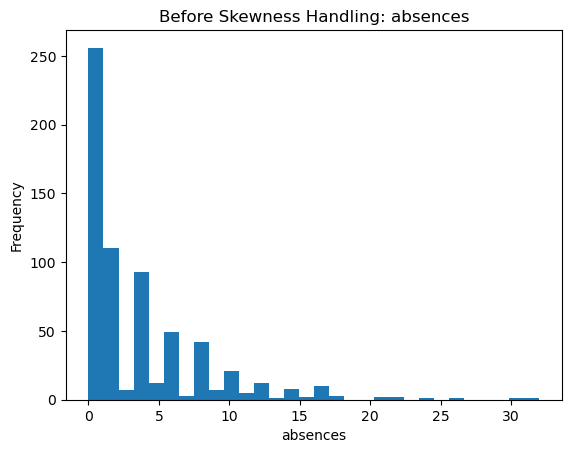

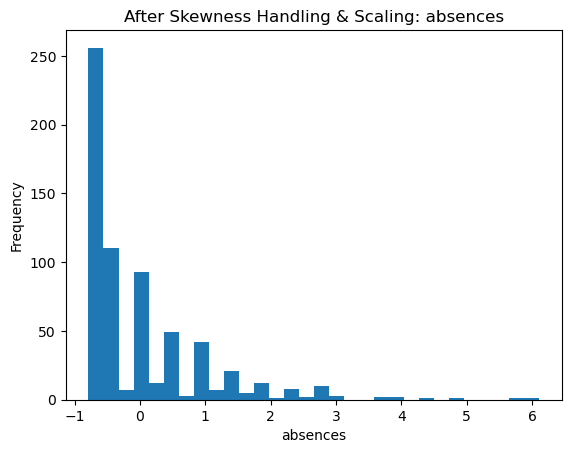

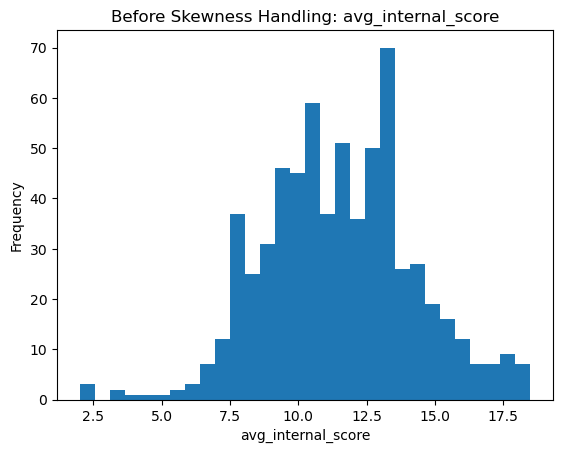

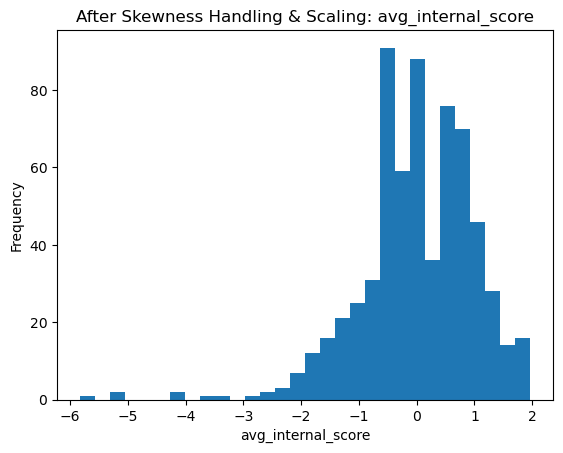

In [41]:
import matplotlib.pyplot as plt

# Select columns to visualize skewness
columns_to_check = ['absences', 'avg_internal_score']

# Create histograms
for col in columns_to_check:
    plt.figure()
    
    # Before scaling & log
    plt.hist(X[col], bins=30)
    plt.title(f"Before Skewness Handling: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
    
    # After skewness handling & scaling
    plt.figure()
    plt.hist(X_scaled[col], bins=30)
    plt.title(f"After Skewness Handling & Scaling: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [36]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,        # features
    y,               # target
    test_size=0.2,   # 20% test data
    random_state=42  # reproducibility
)

# Verify the split
print("Training set shape:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\nTest set shape:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Training set shape:
X_train: (519, 29)
y_train: (519,)

Test set shape:
X_test: (130, 29)
y_test: (130,)


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate performance
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print results
print("Model Performance:\n")

print("Training R² Score:", train_r2)
print("Testing R² Score:", test_r2)

print("\nTraining MAE:", train_mae)
print("Testing MAE:", test_mae)


Model Performance:

Training R² Score: 0.8309192531405123
Testing R² Score: 0.8076930634866559

Training MAE: 0.8700377530683204
Testing MAE: 0.8587260492558217


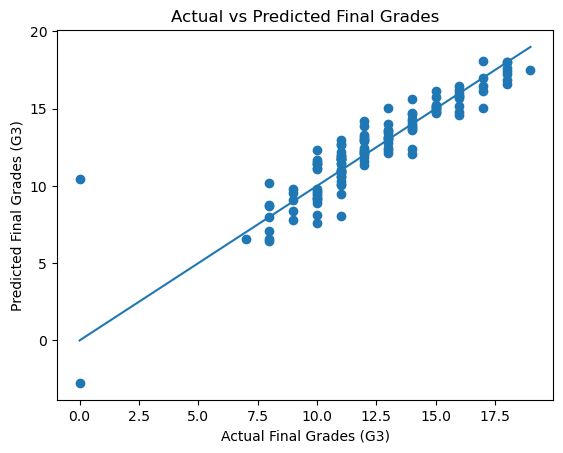

In [38]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure()
plt.scatter(y_test, y_test_pred)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()]
)
plt.xlabel("Actual Final Grades (G3)")
plt.ylabel("Predicted Final Grades (G3)")
plt.title("Actual vs Predicted Final Grades")

plt.show()